In [247]:
import pandas as pd
df = pd.read_csv('./temp/misoginos Revisados.csv', index_col = 0)

In [248]:
df.shape

(223, 14)

In [249]:
df = df.dropna(subset = ['texto', 'label'])

In [250]:
df.label.value_counts()

0.0    117
1.0    104
Name: label, dtype: int64

In [251]:
from sklearn.utils import shuffle
df = shuffle(df)

In [252]:
X = df.texto
y = df.label

In [7]:
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [8]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer(language = 'spanish')

In [9]:
from nltk.corpus import stopwords

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer(max_df=0.6, min_df=1, stop_words=stopwords.words('spanish'), lowercase=True, ngram_range=(1, 3)) 
                      #strip_accents='unicode', preprocessor= stemmer.stem)

In [11]:
x = vec.fit_transform(X)

In [12]:
from sklearn.naive_bayes import MultinomialNB

In [13]:
clf = MultinomialNB()

In [14]:
from sklearn.model_selection import cross_validate

In [15]:
resultado = cross_validate(clf, x,y, cv= 5)

In [16]:
resultado['test_score'].mean()

0.5572022551092319

In [17]:
clf.fit(x,y)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [18]:
texto = 'verde'
clf.predict(vec.transform([texto]))

array([1.])

In [19]:
from sklearn.linear_model import LogisticRegression

clf_log = LogisticRegression()

In [20]:
cross_validate(clf_log, x,y, cv= 5)['test_score'].mean()

0.6524829692271553

In [21]:
from sklearn.metrics import accuracy_score

In [22]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [23]:
parameters = {'kernel':('linear', 'rbf'), 'C':[.01, 0.1, 1, 10]}
svc = SVC()
clf = GridSearchCV(svc, parameters, cv=5)
clf.fit(x, y)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'kernel': ('linear', 'rbf'), 'C': [0.01, 0.1, 1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [24]:
clf.best_estimator_

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [25]:
clf.best_score_    

0.6561085972850679

In [26]:
texto = 'el pasto es verde'
clf.best_estimator_.predict(vec.transform([texto]))

array([1.])

# deep learning

In [156]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
sentences_train, sentences_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1000)

vectorizer = CountVectorizer()
vectorizer.fit(sentences_train)
X_train = vectorizer.transform(sentences_train)
X_test  = vectorizer.transform(sentences_test)

In [157]:
from keras.models import Sequential
from keras import layers

input_dim = X_train.shape[1]  # Number of features


In [158]:
model = Sequential()
model.add(layers.Dense(10, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [159]:
model.compile(loss='binary_crossentropy', 
               optimizer='adam', 
               metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_63 (Dense)             (None, 10)                11930     
_________________________________________________________________
dense_64 (Dense)             (None, 1)                 11        
Total params: 11,941
Trainable params: 11,941
Non-trainable params: 0
_________________________________________________________________


In [160]:
history = model.fit(X_train, y_train,
                     epochs=100,
                     verbose=False,
                     validation_data=(X_test, y_test),
                     batch_size=10)

In [161]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 1.0000
Testing Accuracy:  0.5714


In [162]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

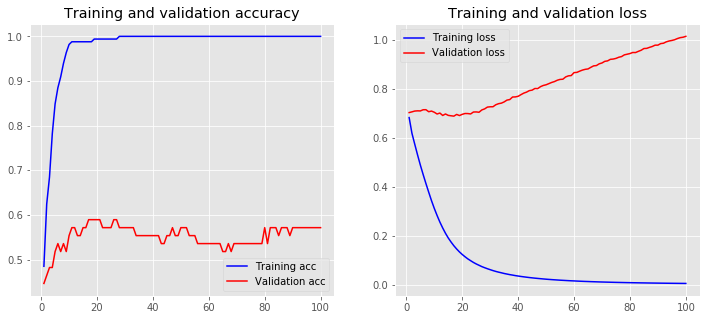

In [163]:
plot_history(history)

In [439]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(sentences_train)

X_train = tokenizer.texts_to_sequences(sentences_train)
X_test = tokenizer.texts_to_sequences(sentences_test)

vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index

print(sentences_train.iloc[2])
print(X_train[2])

Parece George Bush, que no paraba de tirar frases ridículas.
[186, 339, 340, 3, 13, 341, 2, 342, 343, 40]


In [440]:
for word in ['gorda', 'funcion', 'joda']:
    print('{}: {}'.format(word, tokenizer.word_index[word]))

gorda: 5
funcion: 482
joda: 484


In [441]:
sentences_train.apply(len).mean()

126.82424242424243

In [442]:
sentences_train.apply(len).std()

115.8909259855772

In [443]:
from keras.preprocessing.sequence import pad_sequences

maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)



In [180]:
from keras.models import Sequential
from keras import layers

embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_35 (Embedding)     (None, 20, 50)            61150     
_________________________________________________________________
flatten_3 (Flatten)          (None, 1000)              0         
_________________________________________________________________
dense_69 (Dense)             (None, 10)                10010     
_________________________________________________________________
dense_70 (Dense)             (None, 1)                 11        
Total params: 71,171
Trainable params: 71,171
Non-trainable params: 0
_________________________________________________________________


Train on 165 samples, validate on 56 samples
Epoch 1/20
165/165 [==============================] - 2s 10ms/step - loss: 0.6859 - acc: 0.5697 - val_loss: 0.6933 - val_acc: 0.4821
Epoch 2/20
165/165 [==============================] - 0s 512us/step - loss: 0.6486 - acc: 0.8121 - val_loss: 0.6942 - val_acc: 0.5357
Epoch 3/20
165/165 [==============================] - 0s 469us/step - loss: 0.6049 - acc: 0.8667 - val_loss: 0.6956 - val_acc: 0.5179
Epoch 4/20
165/165 [==============================] - 0s 368us/step - loss: 0.5380 - acc: 0.9030 - val_loss: 0.7006 - val_acc: 0.5179
Epoch 5/20
165/165 [==============================] - 0s 527us/step - loss: 0.4468 - acc: 0.9455 - val_loss: 0.7216 - val_acc: 0.5714
Epoch 6/20
165/165 [==============================] - 0s 380us/step - loss: 0.3531 - acc: 0.9758 - val_loss: 0.7436 - val_acc: 0.5179
Epoch 7/20
165/165 [==============================] - 0s 528us/step - loss: 0.2536 - acc: 0.9576 - val_loss: 0.7717 - val_acc: 0.5179
Epoch 8/20
165/165

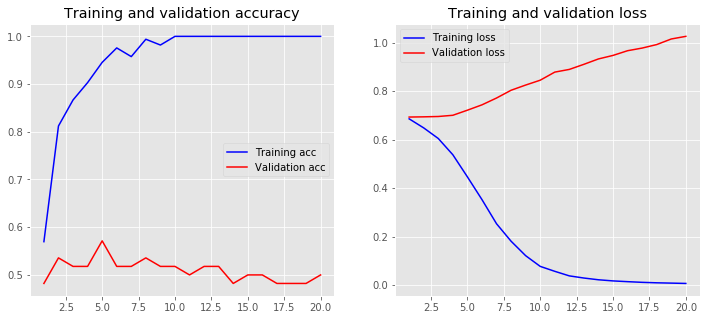

In [181]:
history = model.fit(X_train, y_train,
                    epochs=20,
                    verbose=1,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

In [182]:
from keras.models import Sequential
from keras import layers

embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_36 (Embedding)     (None, 20, 50)            61150     
_________________________________________________________________
global_max_pooling1d_30 (Glo (None, 50)                0         
_________________________________________________________________
dense_71 (Dense)             (None, 10)                510       
_________________________________________________________________
dense_72 (Dense)             (None, 1)                 11        
Total params: 61,671
Trainable params: 61,671
Non-trainable params: 0
_________________________________________________________________


Training Accuracy: 1.0000
Testing Accuracy:  0.6071


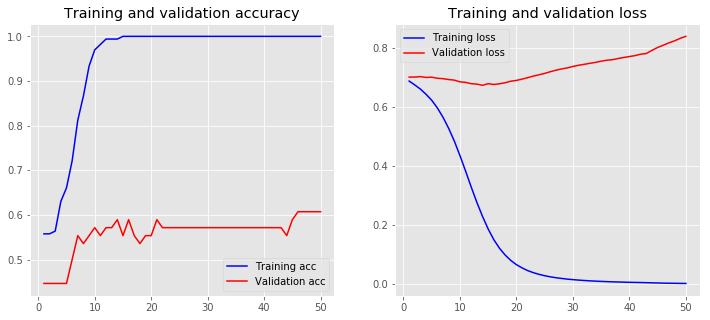

In [183]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

In [184]:
#embedding preentrenados

In [130]:
from gensim.models import Word2Vec
from gensim.models import FastText
from gensim.models import KeyedVectors
from gensim.test.utils import datapath
fast = FastText.load_fasttext_format('C:/Users/p_bag/Jupyter/word2vec/fasttext-sbwc.3.6.e20')

In [131]:
import gensim

In [364]:
embedding_dim = fast.vector_size

In [365]:
embedding_dim

300

In [366]:
#keras.preprocessing.text.text_to_word_sequence(sentences_train.iloc[2], filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~ ', lower=True, split=' ')

In [367]:
#model.wv['casa']

In [368]:
#tokenizer.word_index

In [397]:
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word in tokenizer.word_index:
    try:
        idx = tokenizer.word_index[word] 
        embedding_matrix[idx] = fast.wv[word]
    except:
        pass
        #embedding_matrix[idx] = np.zeros(model.vector_size)

In [398]:
nonzero_elements = np.count_nonzero(np.count_nonzero(embedding_matrix, axis=1))
nonzero_elements / vocab_size

0.998330550918197

In [399]:
model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, 
                           weights=[embedding_matrix], 
                           input_length=maxlen, 
                           trainable=True))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_94 (Embedding)     (None, 100, 300)          359400    
_________________________________________________________________
global_max_pooling1d_57 (Glo (None, 300)               0         
_________________________________________________________________
dense_150 (Dense)            (None, 10)                3010      
_________________________________________________________________
dense_151 (Dense)            (None, 1)                 11        
Total params: 362,421
Trainable params: 362,421
Non-trainable params: 0
_________________________________________________________________


In [400]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    verbose=1,
                    validation_data=(X_test, y_test),
                    batch_size=10)

Train on 165 samples, validate on 56 samples
Epoch 1/50
165/165 [==============================] - 5s 30ms/step - loss: 0.7199 - acc: 0.4545 - val_loss: 0.6789 - val_acc: 0.5357
Epoch 2/50
165/165 [==============================] - 0s 624us/step - loss: 0.6855 - acc: 0.5273 - val_loss: 0.6713 - val_acc: 0.5536
Epoch 3/50
165/165 [==============================] - 0s 606us/step - loss: 0.6712 - acc: 0.6061 - val_loss: 0.6744 - val_acc: 0.5893
Epoch 4/50
165/165 [==============================] - 0s 608us/step - loss: 0.6514 - acc: 0.6485 - val_loss: 0.6738 - val_acc: 0.5893
Epoch 5/50
165/165 [==============================] - 0s 601us/step - loss: 0.6296 - acc: 0.7091 - val_loss: 0.6691 - val_acc: 0.6607
Epoch 6/50
165/165 [==============================] - 0s 650us/step - loss: 0.6044 - acc: 0.8545 - val_loss: 0.6564 - val_acc: 0.6786
Epoch 7/50
165/165 [==============================] - 0s 618us/step - loss: 0.5659 - acc: 0.9030 - val_loss: 0.6616 - val_acc: 0.5714
Epoch 8/50
165/165

Training Accuracy: 1.0000
Testing Accuracy:  0.6607


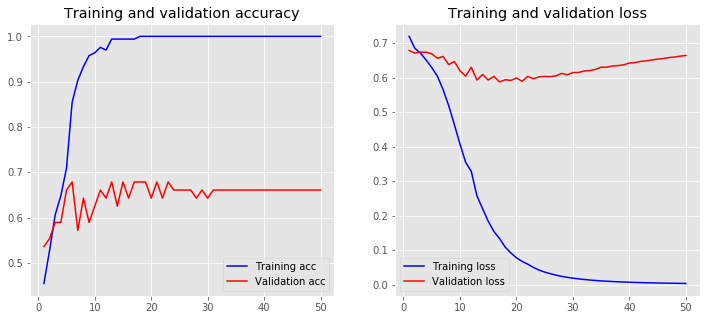

In [401]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

In [417]:
#LSTM
embedding_dim

300

In [418]:
model = Sequential()
model.add(Embedding(vocab_size, 
                    embedding_dim, 
                    input_length=maxlen, 
                    weights = [embedding_matrix], 
                    trainable = False))

# Now with recurrent dropout with a 10% chance of removing any element
model.add(layers.Bidirectional(layers.LSTM(32)))#, recurrent_dropout=0.1)) 
model.add(layers.Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_99 (Embedding)     (None, 100, 300)          359400    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 64)                85248     
_________________________________________________________________
dense_158 (Dense)            (None, 10)                650       
_________________________________________________________________
dense_159 (Dense)            (None, 1)                 11        
Total params: 445,309
Trainable params: 85,909
Non-trainable params: 359,400
_________________________________________________________________


In [419]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])

In [420]:
#model.fit(X_train,y_train,validation_split=0.2,epochs=30)
history = model.fit(X_train, y_train,
                    epochs=20,
                    verbose=1,
                    validation_data=(X_test, y_test))

Train on 165 samples, validate on 56 samples
Epoch 1/20
165/165 [==============================] - 8s 48ms/step - loss: 0.6963 - acc: 0.5030 - val_loss: 0.6888 - val_acc: 0.5893
Epoch 2/20
165/165 [==============================] - 2s 10ms/step - loss: 0.6778 - acc: 0.5333 - val_loss: 0.6813 - val_acc: 0.5893
Epoch 3/20
165/165 [==============================] - 2s 10ms/step - loss: 0.6647 - acc: 0.5455 - val_loss: 0.6780 - val_acc: 0.6071
Epoch 4/20
165/165 [==============================] - 2s 10ms/step - loss: 0.6487 - acc: 0.5515 - val_loss: 0.6781 - val_acc: 0.6786
Epoch 5/20
165/165 [==============================] - 2s 10ms/step - loss: 0.6335 - acc: 0.6667 - val_loss: 0.6797 - val_acc: 0.6429
Epoch 6/20
165/165 [==============================] - 2s 10ms/step - loss: 0.6133 - acc: 0.7576 - val_loss: 0.6698 - val_acc: 0.6964
Epoch 7/20
165/165 [==============================] - 2s 10ms/step - loss: 0.5913 - acc: 0.7636 - val_loss: 0.6636 - val_acc: 0.6607
Epoch 8/20
165/165 [====

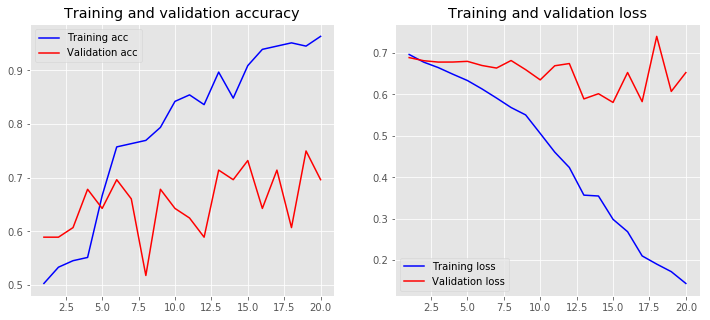

In [421]:
plot_history(history)

In [646]:
i = 27
texto = X.iloc[i].split()
X.iloc[i], y.iloc[i]

('Seguro la gorda come pizza le gusta', 1.0)

In [687]:
texto = 'se subieron a la femimoda para hacer plata'.split()

In [688]:
seq = [tokenizer.word_index[word.lower()] for word in texto if word.lower() in tokenizer.word_index]

In [689]:
#seq

In [690]:
pad = pad_sequences([seq], padding='post', maxlen=maxlen)

In [691]:
model.predict(pad)

array([[0.4772418]], dtype=float32)

In [685]:
#cnn

In [675]:
embedding_dim = 100

model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
model.add(layers.Conv1D(128, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_100 (Embedding)    (None, 100, 100)          119800    
_________________________________________________________________
conv1d_53 (Conv1D)           (None, 96, 128)           64128     
_________________________________________________________________
global_max_pooling1d_58 (Glo (None, 128)               0         
_________________________________________________________________
dense_160 (Dense)            (None, 10)                1290      
_________________________________________________________________
dense_161 (Dense)            (None, 1)                 11        
Total params: 185,229
Trainable params: 185,229
Non-trainable params: 0
_________________________________________________________________


Training Accuracy: 1.0000
Testing Accuracy:  0.5179


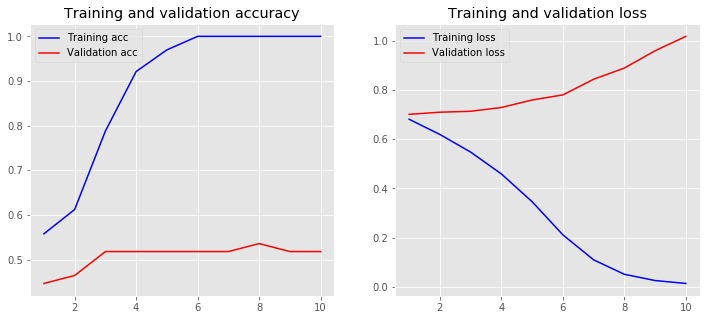

In [202]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    verbose=False,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

In [203]:
def create_model(num_filters, kernel_size, vocab_size, embedding_dim, maxlen):
    model = Sequential()
    model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
    model.add(layers.Conv1D(num_filters, kernel_size, activation='relu'))
    model.add(layers.GlobalMaxPooling1D())
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [204]:
param_grid = dict(num_filters=[32, 64, 128],
                  kernel_size=[3, 5, 7],
                  vocab_size=[5000], 
                  embedding_dim=[50],
                  maxlen=[100])

In [205]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV

# Main settings
epochs = 20
embedding_dim = 50
maxlen = 100
output_file = 'data/output.txt'

# Run grid search for each source (yelp, amazon, imdb)

    # Train-test split
sentences_train, sentences_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1000)

# Tokenize words
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(sentences_train)
X_train = tokenizer.texts_to_sequences(sentences_train)
X_test = tokenizer.texts_to_sequences(sentences_test)

    # Adding 1 because of reserved 0 index
vocab_size = len(tokenizer.word_index) + 1

# Pad sequences with zeros
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

# Parameter grid for grid search
param_grid = dict(num_filters=[32, 64, 128],
                  kernel_size=[3, 5, 7],
                  vocab_size=[vocab_size],
                  embedding_dim=[embedding_dim],
                  maxlen=[maxlen])
model = KerasClassifier(build_fn=create_model,
                        epochs=epochs, batch_size=10,
                        verbose=False)
grid = RandomizedSearchCV(estimator=model, param_distributions=param_grid,
                          cv=4, verbose=1, n_iter=5)
grid_result = grid.fit(X_train, y_train)

# Evaluate testing set
test_accuracy = grid.score(X_test, y_test)

# Save and evaluate results
print(grid_result.best_score_)
print(grid_result.best_params_)
print(test_accuracy)
#print(output_string)

Fitting 4 folds for each of 5 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  1.6min finished


0.6484848484848484
{'vocab_size': 1223, 'num_filters': 128, 'maxlen': 100, 'kernel_size': 3, 'embedding_dim': 50}
0.6071428560784885


In [206]:
#Del libro de chollet

In [207]:
#from keras.preprocessing.text import Tokenizer
samples = ['The cat sat on the mat.', 'The dog ate my homework.']
tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(samples)
sequences = tokenizer.texts_to_sequences(samples)
one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 9 unique tokens.


In [304]:
sentences_train, sentences_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1000)

In [310]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences_train)

X_train = tokenizer.texts_to_sequences(sentences_train)
X_test = tokenizer.texts_to_sequences(sentences_test)

vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index

In [311]:
x_train = [x[::-1] for x in X_train]
x_test = [x[::-1] for x in X_test]

In [312]:
from keras.preprocessing.sequence import pad_sequences

maxlen = 100
X_train = pad_sequences(x_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(x_test, padding='post', maxlen=maxlen)

In [313]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN
from keras.layers import Dense
model = Sequential()
model.add(Embedding(vocab_size, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])


In [314]:
history = model.fit(X_train, y_train, epochs=10, batch_size=10, validation_data=(X_test, y_test))

Train on 165 samples, validate on 56 samples
Epoch 1/10
165/165 [==============================] - 4s 27ms/step - loss: 0.7025 - acc: 0.4970 - val_loss: 0.6789 - val_acc: 0.5714
Epoch 2/10
165/165 [==============================] - 1s 4ms/step - loss: 0.6853 - acc: 0.5394 - val_loss: 0.7329 - val_acc: 0.5000
Epoch 3/10
165/165 [==============================] - 1s 4ms/step - loss: 0.6205 - acc: 0.6545 - val_loss: 0.6807 - val_acc: 0.5357
Epoch 4/10
165/165 [==============================] - 1s 4ms/step - loss: 0.5354 - acc: 0.7818 - val_loss: 0.7702 - val_acc: 0.3929
Epoch 5/10
165/165 [==============================] - 1s 4ms/step - loss: 0.4558 - acc: 0.8364 - val_loss: 0.8538 - val_acc: 0.4107
Epoch 6/10
165/165 [==============================] - 1s 4ms/step - loss: 0.3241 - acc: 0.9515 - val_loss: 0.7785 - val_acc: 0.5179
Epoch 7/10
165/165 [==============================] - 1s 4ms/step - loss: 0.2781 - acc: 0.9394 - val_loss: 0.7586 - val_acc: 0.6429
Epoch 8/10
165/165 [==========

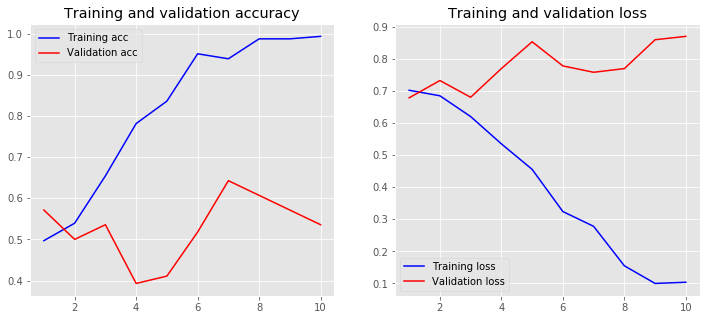

In [315]:
plot_history(history)

In [317]:
from keras.layers import LSTM
model = Sequential()
model.add(Embedding(vocab_size, 128))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])
history = model.fit(X_train, y_train, epochs=10, batch_size = 20, validation_data=(X_test, y_test))

Train on 165 samples, validate on 56 samples
Epoch 1/10
165/165 [==============================] - 6s 33ms/step - loss: 0.6952 - acc: 0.4909 - val_loss: 0.6949 - val_acc: 0.4286
Epoch 2/10
165/165 [==============================] - 1s 8ms/step - loss: 0.6947 - acc: 0.4364 - val_loss: 0.6891 - val_acc: 0.5714
Epoch 3/10
165/165 [==============================] - 1s 8ms/step - loss: 0.6931 - acc: 0.5152 - val_loss: 0.6907 - val_acc: 0.5714
Epoch 4/10
165/165 [==============================] - 1s 8ms/step - loss: 0.6939 - acc: 0.5152 - val_loss: 0.6923 - val_acc: 0.5714
Epoch 5/10
165/165 [==============================] - 1s 8ms/step - loss: 0.6938 - acc: 0.4788 - val_loss: 0.6928 - val_acc: 0.5714
Epoch 6/10
165/165 [==============================] - 1s 8ms/step - loss: 0.6940 - acc: 0.4909 - val_loss: 0.6948 - val_acc: 0.4286
Epoch 7/10
165/165 [==============================] - 1s 8ms/step - loss: 0.6942 - acc: 0.4485 - val_loss: 0.6896 - val_acc: 0.5714
Epoch 8/10
165/165 [==========

In [318]:
vocab_size

1198

In [325]:
len(tokenizer.word_counts)

1197

In [326]:
model = Sequential()
model.add(layers.Embedding(vocab_size, 32))
model.add(layers.Bidirectional(layers.LSTM(32)))
model.add(layers.Dense(1, activation='sigmoid'))

In [327]:
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])


Train on 165 samples, validate on 56 samples
Epoch 1/10
165/165 [==============================] - 8s 46ms/step - loss: 0.6940 - acc: 0.4545 - val_loss: 0.6897 - val_acc: 0.5714
Epoch 2/10
165/165 [==============================] - 3s 16ms/step - loss: 0.6859 - acc: 0.5576 - val_loss: 0.6875 - val_acc: 0.6607
Epoch 3/10
165/165 [==============================] - 3s 16ms/step - loss: 0.6660 - acc: 0.8424 - val_loss: 0.6757 - val_acc: 0.6071
Epoch 4/10
165/165 [==============================] - 3s 16ms/step - loss: 0.6927 - acc: 0.7697 - val_loss: 0.6661 - val_acc: 0.6071
Epoch 5/10
165/165 [==============================] - 3s 16ms/step - loss: 0.5934 - acc: 0.8000 - val_loss: 0.6558 - val_acc: 0.6071
Epoch 6/10
165/165 [==============================] - 3s 16ms/step - loss: 0.5295 - acc: 0.9030 - val_loss: 0.6360 - val_acc: 0.6964
Epoch 7/10
165/165 [==============================] - 3s 16ms/step - loss: 0.4958 - acc: 0.8970 - val_loss: 0.6471 - val_acc: 0.5893
Epoch 8/10
165/165 [====

In [329]:
history = model.fit(X_train, y_train, epochs=10, batch_size = 20, validation_data=(X_test, y_test))

Train on 165 samples, validate on 56 samples
Epoch 1/10
165/165 [==============================] - 3s 16ms/step - loss: 0.3807 - acc: 0.9394 - val_loss: 0.6443 - val_acc: 0.6607
Epoch 2/10
165/165 [==============================] - 3s 16ms/step - loss: 0.2708 - acc: 0.9515 - val_loss: 0.6343 - val_acc: 0.6964
Epoch 3/10
165/165 [==============================] - 3s 16ms/step - loss: 0.1615 - acc: 0.9818 - val_loss: 0.8921 - val_acc: 0.5893
Epoch 4/10
165/165 [==============================] - 3s 16ms/step - loss: 0.2182 - acc: 0.9152 - val_loss: 0.6677 - val_acc: 0.6607
Epoch 5/10
165/165 [==============================] - 3s 16ms/step - loss: 0.1102 - acc: 0.9697 - val_loss: 0.6773 - val_acc: 0.6071
Epoch 6/10
165/165 [==============================] - 3s 16ms/step - loss: 0.0881 - acc: 0.9758 - val_loss: 0.6632 - val_acc: 0.6964
Epoch 7/10
165/165 [==============================] - 3s 16ms/step - loss: 0.0785 - acc: 0.9879 - val_loss: 0.7058 - val_acc: 0.6250
Epoch 8/10
165/165 [====

In [335]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop
model = Sequential()
model.add(layers.Embedding(vocab_size, 128, input_length=maxlen))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))
model.summary()
model.compile(optimizer=RMSprop(lr=1e-4), loss='binary_crossentropy', metrics=['acc'])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_89 (Embedding)     (None, 100, 128)          153344    
_________________________________________________________________
conv1d_49 (Conv1D)           (None, 94, 32)            28704     
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 18, 32)            0         
_________________________________________________________________
conv1d_50 (Conv1D)           (None, 12, 32)            7200      
_________________________________________________________________
global_max_pooling1d_56 (Glo (None, 32)                0         
_________________________________________________________________
dense_144 (Dense)            (None, 1)                 33        
Total params: 189,281
Trainable params: 189,281
Non-trainable params: 0
_________________________________________________________________


In [341]:
history = model.fit(X_train, y_train, epochs=10,  validation_data=(X_test, y_test))

Train on 165 samples, validate on 56 samples
Epoch 1/10
165/165 [==============================] - 0s 267us/step - loss: 0.4035 - acc: 0.9394 - val_loss: 0.6710 - val_acc: 0.5714
Epoch 2/10
165/165 [==============================] - 0s 260us/step - loss: 0.3961 - acc: 0.9273 - val_loss: 0.6628 - val_acc: 0.5893
Epoch 3/10
165/165 [==============================] - 0s 279us/step - loss: 0.3932 - acc: 0.9333 - val_loss: 0.6573 - val_acc: 0.6071
Epoch 4/10
165/165 [==============================] - 0s 260us/step - loss: 0.3857 - acc: 0.9697 - val_loss: 0.6618 - val_acc: 0.5893
Epoch 5/10
165/165 [==============================] - 0s 267us/step - loss: 0.3768 - acc: 0.9515 - val_loss: 0.6848 - val_acc: 0.5357
Epoch 6/10
165/165 [==============================] - 0s 260us/step - loss: 0.3680 - acc: 0.9273 - val_loss: 0.6920 - val_acc: 0.4821
Epoch 7/10
165/165 [==============================] - 0s 260us/step - loss: 0.3615 - acc: 0.9212 - val_loss: 0.6809 - val_acc: 0.5536
Epoch 8/10
165/16

In [ ]:
#ngramas

In [348]:
# keras module for building LSTM 
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding, LSTM, Dense
from keras.preprocessing.text import Tokenizer
from keras.callbacks import EarlyStopping
from keras.models import Sequential
import keras.utils as ku 

# set seeds for reproducability
from tensorflow import set_random_seed
from numpy.random import seed
set_random_seed(2)
seed(1)

import pandas as pd
import numpy as np
import string, os 

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

In [351]:
def clean_text(txt):
    txt = "".join(v for v in txt if v not in string.punctuation).lower()
    #txt = txt.encode("utf8").decode("ascii",'ignore')
    return txt 

corpus = [clean_text(x) for x in X]
corpus[:10]

['solyema hay tanta fea en el foro que tu post pasa a ser tema de la hermenéutica',
 'la gorda sabe q si se sube el helicóptero no despega así q está preparando su huida anticipada',
 'la gorda alcides con el agua al cuello en san fernando y aplaude a los moyano que paran en el ritz de madrid',
 'simplemente se trató de una pedorreta de la gorda',
 ' ¡¡¡¡¡¡ gorda ',
 'y es bien fea',
 'pinta de gorda con la bombacha amarronada jajaaa',
 'bimai y gorda no se olvide',
 'que falta le hacía aparecer así en estas fotos más fea imposible',
 'mrce44 en cualquier momento aparece la fea']